<a href="https://colab.research.google.com/github/AmitHasanShuvo/Machine-Learning-Projects/blob/master/MNIST_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST classification with tensorflow

I tried to implement my learnings from **Laurence Moroney**'s coursera course "**Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning**" and **Tensorflow** official documentations. 

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Loading the dataset

mnist = tf.keras.datasets.mnist

In [0]:
#Downloading the dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [16]:
#Printing the data, but it's tough to understands. Let's use matplotlib
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

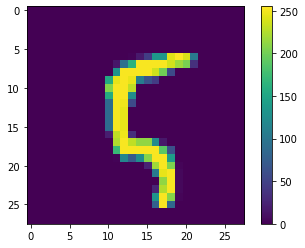

In [17]:
#For betterr understanding of data

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)
plt.show()


In [18]:
#size of our x_train and input shape
x_train.shape

(60000, 28, 28)

In [19]:
x_test.shape

(10000, 28, 28)

In [0]:
#normalizing

x_train = x_train/255.0
y_test = y_test/255.0

In [0]:
#Defining callback functions

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
#Defining the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
#Set the optimizer, loss and metrics

model.compile(optimizer = 'adam' , loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [24]:
#Fitting the model, define the epoch
callbacks = myCallback()

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2014 - accuracy: 0.9407
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0794 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 5/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0276 - accuracy: 0.9913
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9912


References:
1. https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%202%20-%20Handwriting%20Recognition/Exercise2-Answer.ipynb